# 💲 Sales prediction 
 
**Author:** José Antônio Afonso   
**Country:** Angola 


---

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos de Regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Métricas de Avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuração
plt.style.use('seaborn-v0_8')
%matplotlib inline


In [14]:
df = pd.read_csv('../data/Advertising.csv')

# Exploração inicial
print("=== Initial exploration of the data ===")
print(f"Dataset form: {df.shape}")
print(f"\nFirst 5  rows:")
print(df.head())

print(f"\nDataset info:")
print(df.info())

print(f"\nDescriptive statistics:")
print(df.describe())

print(f"\nNull values per column:")
print(df.isnull().sum())

# Verificar a coluna de preço (target)
print(f"\nAvailable columns: {df.columns.tolist()}")

=== Initial exploration of the data ===
Dataset form: (200, 5)

First 5  rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Descriptive statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.0425

In [38]:
print(f"Null columns {df.isnull().sum()}")
print("Droping Unnamed column")
df.drop(columns=['Unnamed: 0'],inplace=True)
print("Column dropped")
df.head()

Null columns Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
Droping Unnamed column
Column dropped


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


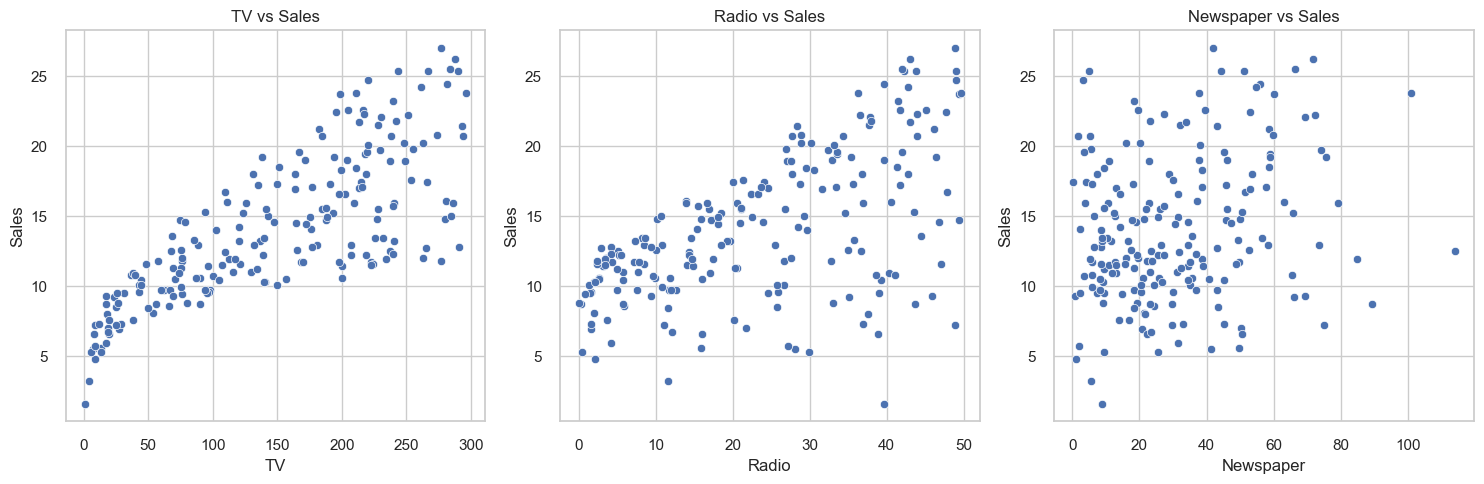

In [39]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x='TV',y='Sales',data=df)
plt.title('TV vs Sales')


plt.subplot(1,3,2)
sns.scatterplot(x='Radio',y='Sales',data=df)
plt.title('Radio vs Sales')

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper',y='Sales',data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

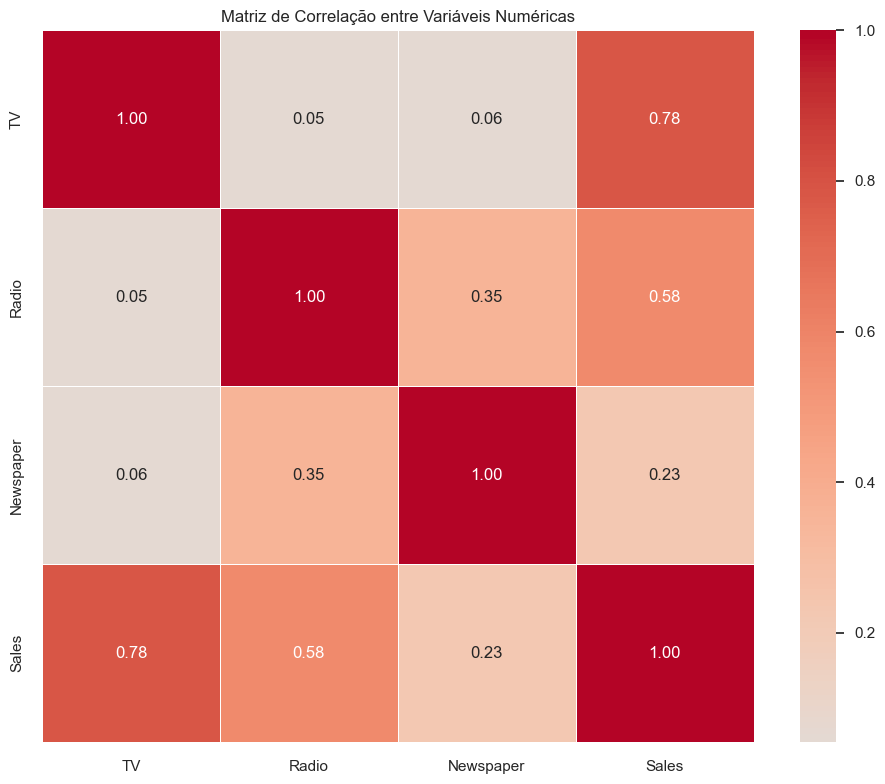

Correlation with price:
Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [40]:
# Matriz de correlação para variáveis numéricas
plt.figure(figsize=(10, 8))

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Matriz de Correlação entre Variáveis Numéricas')
    plt.tight_layout()
    plt.show()
    
    # Correlação com preço
    if 'Sales' in correlation_matrix.columns:
        print("Correlation with price:")
        price_corr = correlation_matrix['Sales'].sort_values(ascending=False)
        print(price_corr)

In [41]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

#Splitting the data into train and test
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_test) 
X_test = scaler.transform(X_test)

print(f"Size of the test : {X_test.shape[0]} amostras")
print(f"Size of the train : {X_train.shape[0]} amostras")

Size of the test : 60 amostras
Size of the train : 140 amostras


In [42]:
# Definir modelos a testar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Treinar e avaliar cada modelo
results = {}

print("Initiating the train and avaliation of the pipelines")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Criar pipeline com pré-processamento + modelo
    pipeline = Pipeline([
        ('Scaler', scaler),
        ('model', model)
    ])
    
    # Treinar modelo
    pipeline.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = pipeline.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results[name] = {
        'model': pipeline,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

Initiating the train and avaliation of the pipelines

Training Linear Regression...
Linear Regression - MAE: 10.21, RMSE: 11.41, R²: -3.7656

Training Ridge Regression...
Ridge Regression - MAE: 10.14, RMSE: 11.34, R²: -3.7132

Training Random Forest...
Random Forest - MAE: 9.88, RMSE: 11.18, R²: -3.5777

Training Support Vector Regression...
Support Vector Regression - MAE: 4.51, RMSE: 6.38, R²: -0.4927


In [45]:

def predict_sales(model, platforms_features):
    """
    Predict the price of a car based on the features
    """
    # Criar DataFrame com as features
    new_advertising_df = pd.DataFrame([platforms_features])
    
    # Fazer previsão
    predicted_sale = model.predict(new_advertising_df)[0]
    
    return predicted_sale

# Exemplo de uso com o melhor modelo
if 'best_model_name' in locals():
    # Exemplo de características de um carro
    platforms_examples = {
        'TV':100,
        'Radio':50,
        'Newspaper':200
        
        
    }
    
    predicted_sale = predict_sales(best_model, platforms_examples)
    print(f"\nPrevision example:")
    print(f"Feature: {platforms_examples}")
    print(f"Predicted price: €{predicted_sale:,.2f}")


Prevision example:
Feature: {'TV': 100, 'Radio': 50, 'Newspaper': 200}
Predicted price: €14.26
